<a href="https://colab.research.google.com/github/EdwardObala1/ML_Simple_Datacleaning/blob/main/Group_Work_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>AI Group Work</h1></br>
<h4>Group Members</h4></br>
<h6>Edward Obala</h6></br>
<h6>Audrey Njenga</h6></br>
<h6>Kelvin Wachira</h6></br>
<h6>Ziithe HIwa</h6></br></br></br>
<h6>Dataset:Taxes on Profits, Income and Capital gains</h6></br>
<h6>Dataset:Annual Salary After Taxes</h6></br></br>
<h3>Cleaning The Dataset</h3> 

In [63]:
#Import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sc

In [64]:
#First dataset after being read
from google.colab import files
uploaded = files.upload()
df1=pd.read_excel("API_GC.TAX.YPKG.ZS_DS2_en_excel_v2_2071588.xls", index_col=None, header=3)

Saving API_GC.TAX.YPKG.ZS_DS2_en_excel_v2_2071588.xls to API_GC.TAX.YPKG.ZS_DS2_en_excel_v2_2071588 (3).xls


In [65]:
df1

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,17.984606,22.008815,27.475140,30.531278,27.398017,28.377410,32.296542,34.091664,40.880527,42.905298,21.659345,22.026284,NaN,NaN,NaN
2,Angola,AGO,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,89.398523,61.732347,74.927387,73.519720,76.487642,79.920953,85.144038,81.827616,81.078385,66.361932,71.990661,76.457265,78.006920,74.857882,69.925117,68.688069,68.505606,69.909963,NaN,NaN,NaN
3,Albania,ALB,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,NaN,NaN,20.762265,19.309929,20.540481,NaN,NaN,NaN,NaN,NaN,NaN,19.805363,19.090732,19.753872,19.075042,20.568403,16.516516,21.765606,23.382676,26.006401,NaN
4,Andorra,AND,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,57.103332,58.222010,58.076652,56.302976,54.446040,54.693150,55.819155,57.041016,60.369918,58.687334,55.212577,56.029800,54.926440,55.074574,55.623569,54.799308,56.233873,56.750678,55.186439,NaN,NaN
262,Zambia,ZMB,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,NaN,37.927814,43.405853,46.366049,44.300189,43.676846,45.744478,44.375985,43.957141,48.862744,51.489674,53.692041,52.142890,43.733702,41.119102,46.345083,50.502991,43.073388,44.269295,NaN,NaN


<h2>Checking for null values</h2>

In [66]:
#checking how many null values are there in the list
df1.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
2000              179
2001              173
2002              168
2003              164
2004              162
2005              162
2006              159
2007              159
2008              151
2009              146
2010              142
2011              137
2012              133
2013              136
2014              131
2015              128
2016              130
2017              129
2018              140
2019              170
2020              264
dtype: int64

In [67]:
#Creating a variable of all missing values
missing_value=np.nan
#Dropping rows with complete null values
df1=df1.dropna(how="all")
#filling single null cells with zeros
df1_0_fill=df1.fillna(0)
#filling the cell with data carried forward
df1_f_fill=df1.fillna(method="ffill")
#filling the cell with data carried back
df1_b_fill=df1.fillna(method="bfill")
#Using interpolation to find the median value (The onw we use)
df1=df1.interpolate()


<h5>Solution to fill up missing spaces and cells after cleaning up empty rows</h5>

<p>First lines are missing values so I am going to fill them up with backfill and forward fill after interpolation assuming the data is not that varying</p>

In [68]:
#backfill
df1=df1.fillna(method="bfill")
#forward fill
df1=df1.fillna(method="ffill")
df1

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,89.398523,61.732347,74.927387,73.519720,76.487642,79.920953,17.984606,22.008815,27.475140,30.531278,27.398017,28.377410,32.296542,34.091664,40.880527,42.905298,21.659345,22.026284,23.382676,26.006401,NaN
1,Afghanistan,AFG,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,89.398523,61.732347,74.927387,73.519720,76.487642,79.920953,17.984606,22.008815,27.475140,30.531278,27.398017,28.377410,32.296542,34.091664,40.880527,42.905298,21.659345,22.026284,23.382676,26.006401,NaN
2,Angola,AGO,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,89.398523,61.732347,74.927387,73.519720,76.487642,79.920953,85.144038,81.827616,81.078385,66.361932,71.990661,76.457265,78.006920,74.857882,69.925117,68.688069,68.505606,69.909963,23.382676,26.006401,NaN
3,Albania,ALB,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,76.540209,54.698202,20.762265,19.309929,20.540481,68.986165,73.120366,69.574633,68.596593,56.930106,61.425338,19.805363,19.090732,19.753872,19.075042,20.568403,16.516516,21.765606,23.382676,26.006401,NaN
4,Andorra,AND,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,63.681896,47.664056,20.247495,19.993715,21.455949,58.051378,61.096694,57.321649,56.114800,47.498281,50.860016,13.203575,12.727155,13.169248,12.716694,13.712269,11.011010,14.510404,15.588450,17.337601,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,51.965056,52.443320,52.902035,50.693387,49.083554,49.570138,50.118185,50.778189,53.224626,35.212400,33.127546,33.617880,34.983666,34.654620,33.374141,32.879585,33.740324,34.050407,33.111864,0.000000,NaN
260,"Yemen, Rep.",YEM,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,54.534194,55.332665,55.489343,53.498181,51.764797,52.131644,52.968670,53.909602,56.797272,46.949867,44.170062,44.823840,44.955053,44.864597,44.498855,43.839446,44.987099,45.400542,44.149152,0.000000,NaN
261,South Africa,ZAF,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,57.103332,58.222010,58.076652,56.302976,54.446040,54.693150,55.819155,57.041016,60.369918,58.687334,55.212577,56.029800,54.926440,55.074574,55.623569,54.799308,56.233873,56.750678,55.186439,0.000000,NaN
262,Zambia,ZMB,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,57.103332,37.927814,43.405853,46.366049,44.300189,43.676846,45.744478,44.375985,43.957141,48.862744,51.489674,53.692041,52.142890,43.733702,41.119102,46.345083,50.502991,43.073388,44.269295,0.000000,NaN


In [69]:
#to tidy the data set I am sending the year taxation values into a column and out of the header row
df1_long=pd.melt(df1, id_vars=["Country Name","Country Code","Indicator Name","Indicator Code"], var_name="Year",value_name="Tax Rate")

#What you see it the tidy version of the table ;-)
# #backfill
# df1_long=df1_long.fillna(method="bfill")
# #forward fill
# df1_long=df1_long.fillna(method="ffill")
df1_long.interpolate()
df1_long

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Tax Rate
0,Aruba,ABW,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2000,89.398523
1,Afghanistan,AFG,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2000,89.398523
2,Angola,AGO,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2000,89.398523
3,Albania,ALB,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2000,76.540209
4,Andorra,AND,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2000,63.681896
...,...,...,...,...,...,...
5539,Kosovo,XKX,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2020,NaN
5540,"Yemen, Rep.",YEM,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2020,NaN
5541,South Africa,ZAF,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2020,NaN
5542,Zambia,ZMB,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2020,NaN


In [70]:
df1_long.describe()

,Tax Rate
count,5280.000000
mean,35.222173
std,15.303306
min,-4.468999
25%,25.360408
50%,34.087168
75%,43.934623
max,130.539775


In [71]:
df1_long["Country Name"]=="Rwanda"

0       False
1       False
2       False
3       False
4       False
        ...  
5539    False
5540    False
5541    False
5542    False
5543    False
Name: Country Name, Length: 5544, dtype: bool

In [72]:
df1_long.loc[df1_long['Country Name']=="Rwanda"]

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Tax Rate
201,Rwanda,RWA,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2000,25.642059
465,Rwanda,RWA,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2001,21.720079
729,Rwanda,RWA,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2002,18.475471
993,Rwanda,RWA,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2003,15.579255
1257,Rwanda,RWA,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2004,15.017932
1521,Rwanda,RWA,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2005,16.806251
1785,Rwanda,RWA,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2006,17.652204
2049,Rwanda,RWA,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2007,16.614748
2313,Rwanda,RWA,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2008,16.981270
2577,Rwanda,RWA,"Taxes on income, profits and capital gains (% ...",GC.TAX.YPKG.ZS,2009,4.766527


<h5>Tax Rate Wage returns in Rwanda from 2000 to 2018</h5>
</br><p>This shows the taxed wage returns in Rwanda from the year 2000 to 2018. In using this we are trying to show the corelation between a rise in tax collection and tax compliance over the year with improvement of technological integration </p>
</br><p>Missing values were filled through interpolation of the previous and subsequet years</p>

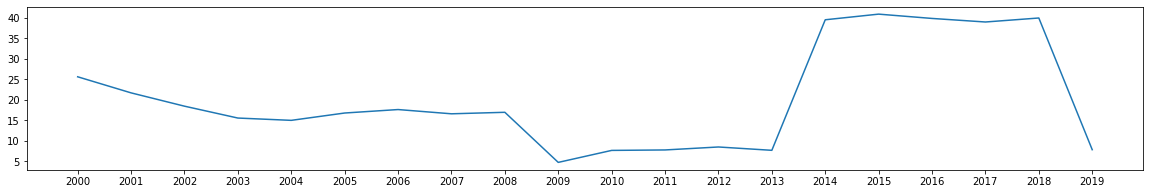

In [73]:
plot.rcParams["figure.figsize"] = (20,3)
plot.plot(df1_long.loc[df1_long['Country Name']=="Rwanda"]["Year"],
          df1_long.loc[df1_long['Country Name']=="Rwanda"]["Tax Rate"])

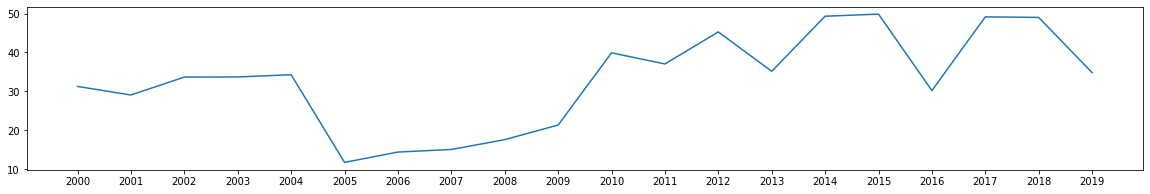

In [74]:
plot.rcParams["figure.figsize"] = (20,3)
plot.plot(df1_long.loc[df1_long['Country Name']=="Kenya"]["Year"],
          df1_long.loc[df1_long['Country Name']=="Kenya"]["Tax Rate"])

In [75]:
from google.colab import files
uploaded = files.upload()
tax_revenue=pd.read_csv("data-tax-revenue-for-sub-saharan-africa-1980-2010 - Base_All.csv")

Saving After tax plus year gross.csv to After tax plus year gross.csv


In [76]:
tax_revenue["Country"]=="Rwanda"

0       False
1       False
2       False
3       False
4       False
        ...  
1266    False
1267    False
1268    False
1269    False
1270    False
Name: Country, Length: 1271, dtype: bool

In [77]:
#Dropping rows with complete null values in the tax_revenue dataset
tax_revenue=tax_revenue.fillna(0)

In [78]:
tax_revenue=tax_revenue.interpolate()
tax_revenue


,Country,Year,Total Taxes,Direct Taxes,Corporate Tax,Individual Tax,Indirect Taxes,Trade Taxes,Resource Taxes,Non-Resource Taxes,GDP,Exchange rate (USD),Population (millions),Inflation\n(Av CPI),Income Classification (WB),Original Inc Classification (WB),Modified Inc Classification,Trading Bloc
0,Angola 1980,1980,0,0,0,0,0,0,0,0,0,0,0.00,46.70,LM,0,0,0
1,Angola 1981,1981,0,0,0,0,0,0,0,0,0,0,0.00,1.40,LM,0,0,0
2,Angola 1982,1982,0,0,0,0,0,0,0,0,0,0,0.00,1.80,LM,0,0,0
3,Angola 1983,1983,0,0,0,0,0,0,0,0,0,0,0.00,1.80,LM,0,0,0
4,Angola 1984,1984,0,0,0,0,0,0,0,0,0,0,0.00,1.80,LM,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,Zimbabwe 2006,2006,0,0,0,0,0,0,0,0,5.45,1.00,12.46,33.00,L,0,0,0
1267,Zimbabwe 2007,2007,0,0,0,0,0,0,0,0,5.29,1.00,12.49,-72.70,L,0,0,0
1268,Zimbabwe 2008,2008,0.13,0.04,0.02,0.02,0.04,0.05,0,0.13,4.42,1.00,12.58,157.00,L,0,0,0
1269,Zimbabwe 2009,2009,0.88,0.22,0.04,0.16,0.45,0.21,0,0.88,5.84,1.00,12.58,6.20,L,0,0,0


In [79]:

tax_revenue.filter(regex="Rwanda")


""
0
1
2
3
4
...
1266
1267
1268
1269


In [80]:
rwanda_data = tax_revenue["Country"].str.contains('Rwanda', regex=False)
trial = tax_revenue[rwanda_data]
trial

,Country,Year,Total Taxes,Direct Taxes,Corporate Tax,Individual Tax,Indirect Taxes,Trade Taxes,Resource Taxes,Non-Resource Taxes,GDP,Exchange rate (USD),Population (millions),Inflation\n(Av CPI),Income Classification (WB),Original Inc Classification (WB),Modified Inc Classification,Trading Bloc
899,Rwanda 1980,1980,11.26,2.45,1.28,0.96,2.66,5.88,0,11.26,116.88,0.01,5.16,7.20,L,0,0,EAC
900,Rwanda 1981,1981,12.41,3.62,1.13,2.23,3.08,4.89,0,12.41,132.68,0.01,5.35,6.40,L,0,0,EAC
901,Rwanda 1982,1982,12.81,2.90,1.26,1.44,3.33,5.25,0,12.81,141.54,0.01,5.55,12.60,L,0,0,EAC
902,Rwanda 1983,1983,13.14,2.68,1.18,1.37,4.06,5.16,0,13.14,153.65,0.01,5.76,6.60,L,0,0,EAC
903,Rwanda 1984,1984,15.09,3.22,1.19,1.59,4.25,6.52,0,15.09,171.91,0.01,5.90,5.40,L,0,0,EAC
904,Rwanda 1985,1985,18.76,3.57,1.37,1.69,5.26,8.75,0,18.76,187.68,0.01,6.10,1.70,L,0,0,EAC
905,Rwanda 1986,1986,21.47,3.64,1.24,1.90,5.31,11.23,0,21.47,184.01,0.01,6.31,-1.10,L,0,0,EAC
906,Rwanda 1987,1987,20.00,4.64,2.16,1.92,6.25,7.64,0,20.00,185.74,0.01,6.53,4.10,L,0,0,EAC
907,Rwanda 1988,1988,19.73,5.18,1.89,2.08,6.55,6.59,0,19.73,190.71,0.01,6.76,2.90,L,0,0,EAC
908,Rwanda 1989,1989,20.89,5.24,1.87,2.15,7.46,6.68,0,20.89,208.32,0.01,6.99,1.00,L,0,0,EAC


**TAX ANALYSIS**</br>
This shows the rise in total taxes over the years since 1980 to 2010

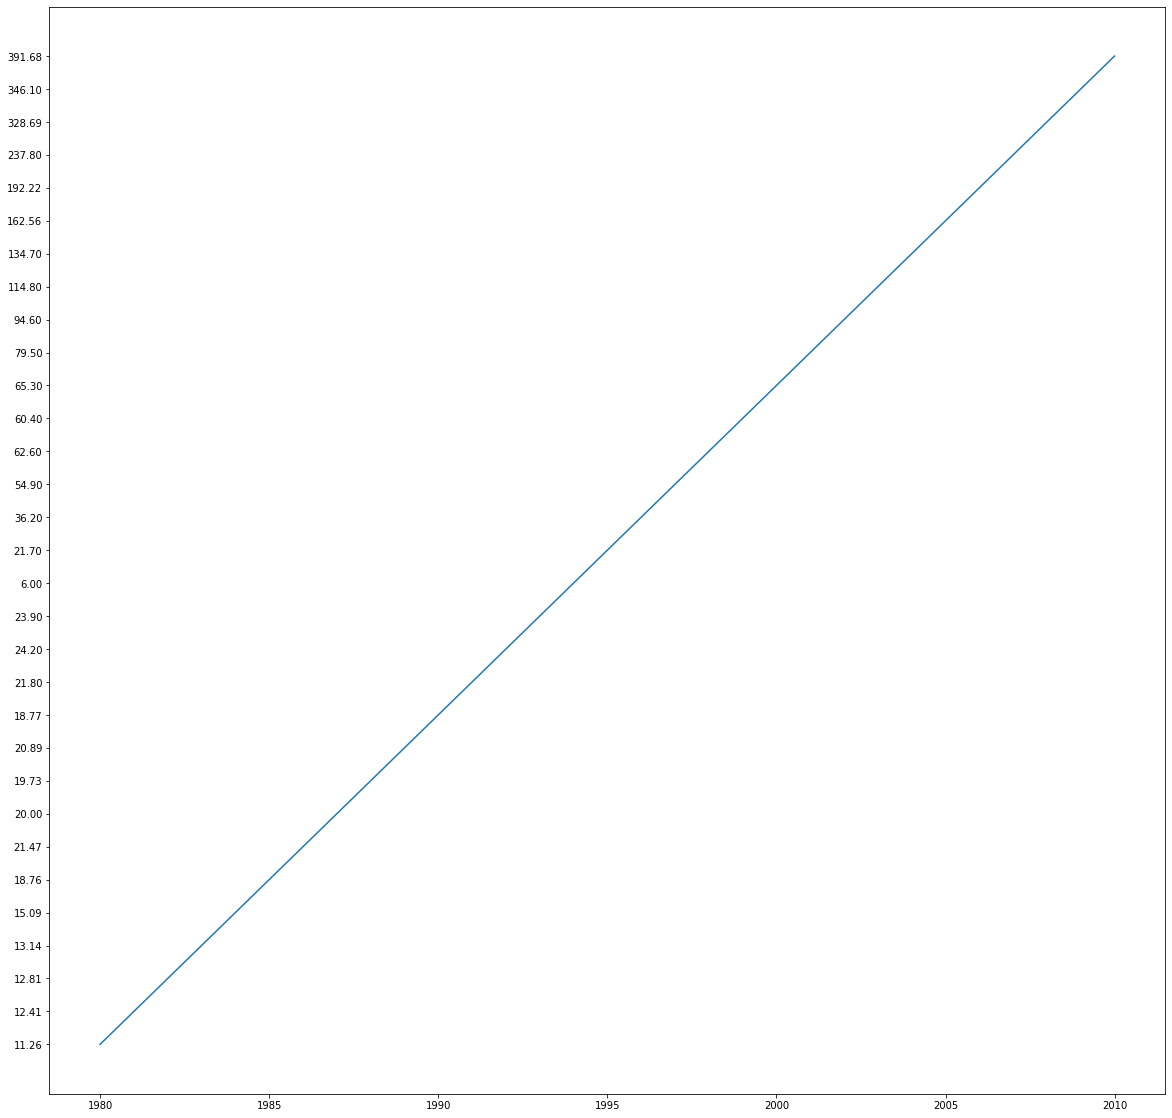

In [84]:
plot.rcParams["figure.figsize"] = (20,20)
plot.plot(trial["Year"],
          trial["Total Taxes"])

**Scatter plot**</br>
Showing a scatter plot of the tax distribution in Rwanda of all forms of taxes 

KeyError: ignored

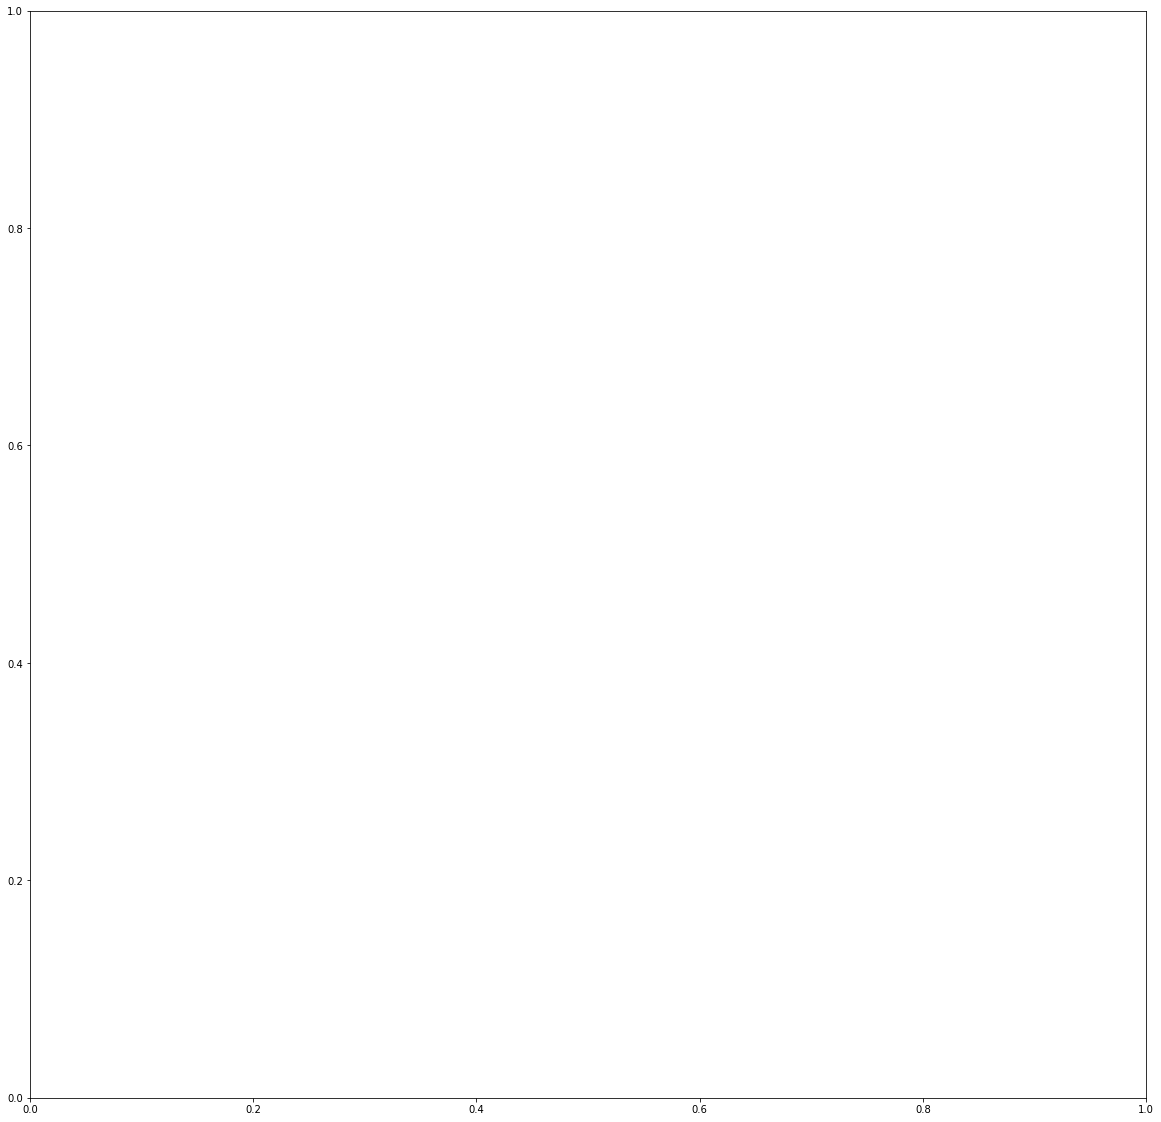

In [93]:
# multiple line plots
plot.plot( trial["Direct Taxes"], trial["Year"], data=trial, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plot.plot( trial["Indirect Taxes"], trial["Year"], data=trial, marker='', color='olive', linewidth=2)
plot.plot( trial["GDP"], trial["Year"], data=trial, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# show legend
plt.legend()